<a href="https://colab.research.google.com/github/ArunRamji/Price_suggestion_model/blob/main/Pricing_suggestion_model_for_e_commerce_product_PART_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import dataset from google drive 
!unzip -uq "/content/drive/My Drive/Datasets/Online_pricing_model.zip" -d "/Dataset"

In [ ]:
#to check gpu connected
import tensorflow as tf 
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
#GPU device list
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2588841512599680542, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13970370587315284921
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12184586601393951958
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11146783616
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9890151660799117
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 3000)

%matplotlib inline

In [ ]:
df = pd.read_csv('/Dataset/ML_Dataset/ML_Dataset.csv')

In [ ]:
df.head(20)

,id,attr1,attr2,attr3,attr4,attr5,attr6,title,sold_price
0,742122,4,27,149.0,3808.0,1.0,99.0,one teaspoon bandit distressed denim shorts (23),65.0
1,652751,4,3,89.0,1996.0,NaN,1500.0,gucci emily mini guccissima mini red leather bag,600.0
2,228229,4,26,301.0,5194.0,NaN,89.0,steve madden polka dot wedges 8.5 - wi06,12.0
3,645810,4,27,NaN,6335.0,NaN,0.0,crown & ivy navy blue floral print shorts,12.0
4,854374,4,22,302.0,3606.0,2.0,45.0,grey wide leg dress pants,22.0
5,761543,4,9,178.0,4356.0,NaN,99.0,end of summer sale,11.0
6,290771,4,14,223.0,NaN,NaN,2225.0,authentic tiffany ring,550.0
7,883903,3,26,252.0,NaN,NaN,200.0,mens nike kyrie 5 (patrick star) spongebob w/s...,165.0
8,922516,4,26,301.0,982.0,1.0,1800.0,chanel metallic suede cc wedge,500.0
9,577777,3,12,NaN,NaN,1.0,50.0,linkin park hoodie,22.0


In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
df_title = pd.DataFrame(df['title'].value_counts())
df_title.reset_index(inplace=True)
df_title.columns = ['title','count']

In [ ]:
df_title[df_title['count']>10]

,title,count
0,gucci belt,809
1,louis vuitton neverfull mm,800
2,louis vuitton,759
3,christian louboutin,710
4,shoes,644
5,louis vuitton bag,560
6,louis vuitton speedy 30,507
7,louis vuitton wallet,502
8,dress,495
9,louis vuitton purse,485


In [ ]:
df.count()

attr1         1029850
attr2         1029850
attr3          843080
attr4          864417
attr5          495664
attr6         1029850
title         1029761
sold_price    1029850
dtype: int64

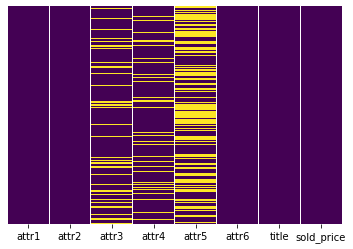

In [ ]:
#check if there any missing value
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')#sns.heatmap(df.isna())

In [ ]:
lst =[]
lst.append(df['attr3'].isnull().sum())
lst.append(df['attr4'].isnull().sum())
lst.append(df['attr5'].isnull().sum())

labels = ['attr'+str(x) for x in range(3,6)]

Text(0.5, 0, 'Columns')

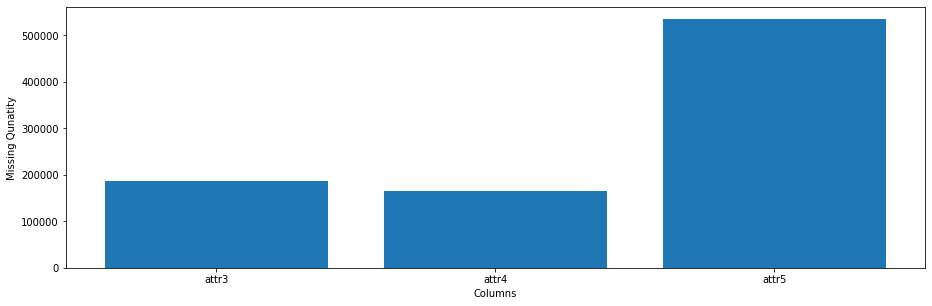

In [ ]:
plt.figure(figsize=[15.4,4.8])
plt.bar(x=range(1,len(lst)+1),height=lst,tick_label=labels)
plt.ylabel('Missing Qunatity')
plt.xlabel('Columns')

In [ ]:
#Imputing missing values with median
for i in range(3,6):
  #print(i)
  df['attr'+str(i)].fillna(df['attr'+str(i)].mean(),inplace=True)

In [ ]:
df['title'].isnull().sum()

89

In [ ]:
df['title'].fillna('unknown',inplace=True) #imputing missing value with new value 

In [ ]:
df['title'].isnull().sum()

0

In [ ]:
# #one hot encoding
# df_ = pd.get_dummies(df,columns=['title'])

In [ ]:
# #Named Entity Recognition for products

# import spacy
# from spacy import displacy
# from collections import Counter
# import en_core_web_sm
# nlp = en_core_web_sm.load()

In [ ]:
# product = nlp(df['title'][40000])
# print([(X.text, X.label_) for X in product.ents])

In [ ]:
nouns = []
product_name = []
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
for i in range(0,len(df['title'])):
  txt = df['title'][i]
  # non_nouns = [word for (word, pos) in nltk.pos_tag(nltk.word_tokenize(txt)) if pos[0] != 'N']
  nouns = [word for (word, pos) in nltk.pos_tag(nltk.word_tokenize(txt)) if pos[0] == 'N']
  # for (word,pos) in nltk.pos_tag(nltk.word_tokenize(df['title'][i])):
  #   if pos[0] == 'N':
  #     nouns.append(word)
  #   else:
  #     nouns.append('unk')
  #print(i)
  #print(nouns[-1])
  #print(i)
  if len(nouns) == 0 :
    product_name.append('unk')
  else:
    product_name.append(nouns[-1])
  # if i >1000:
  #   break

len(product_name)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


1029850

In [ ]:
assert len(df['title']) == len(product_name)
from collections import Counter
c = Counter(product_name)

count_df = pd.DataFrame(c,index=['Count'])
count_df


,shorts,bag,wi06,pants,sale,ring,w/shirt,cc,hoodie,shirt,container,t-shirt,xl,top,purse,illusions,nwot,size,jacket,mm,sweater,sandals,tassels,nwt,dior,dickey,costume,desc,boots,shoes,moccasins,mules,alma,monnaie,condition,w/strap,jeans,skirt,tote,palette,...,seeds,e16,storyteller,moonflower,v2color,woofer,w/wings,rb358n,calming,dropfrom,be4220,babyboot,gerardine,misook,moots,samdals,headband/earwarmers,requests,nodustbag/box/lock,length*54,sp0996,genaissance,bosysuit,pave-nwt,marmt,marrakech,authentic.deal,a162,patchouli,chrm,rk9114,white/copper,trade***do,gg0291s,aegirine,bakeware,diener,vietnamranger,white*nwt,crossbodies
Count,12605,55842,1,11391,928,6063,1,93,5226,13190,19,3688,4916,19260,10733,3,2809,43480,23871,4625,12646,9833,97,8162,107,33,628,37,21640,12263,278,1445,666,3,2246,33,18025,8701,12777,1255,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
def get_key(dict):
  lst = []
  for i,j in dict.items():
    if j > 100:
      lst.append([i,j])
  return lst


In [ ]:
most_common_words = get_key(c)
print(len(most_common_words))
print(most_common_words)

699
[['shorts', 12605], ['bag', 55842], ['pants', 11391], ['sale', 928], ['ring', 6063], ['hoodie', 5226], ['shirt', 13190], ['t-shirt', 3688], ['xl', 4916], ['top', 19260], ['purse', 10733], ['nwot', 2809], ['size', 43480], ['jacket', 23871], ['mm', 4625], ['sweater', 12646], ['sandals', 9833], ['nwt', 8162], ['dior', 107], ['costume', 628], ['boots', 21640], ['shoes', 12263], ['moccasins', 278], ['mules', 1445], ['alma', 666], ['condition', 2246], ['jeans', 18025], ['skirt', 8701], ['tote', 12777], ['palette', 1255], ['earrings', 8482], ['tank', 5023], ['sneakers', 12185], ['blazer', 3194], ['vuitton', 2813], ['sandal', 2685], ['watch', 6397], ['wristlet', 2003], ['leggings', 7324], ['clutch', 3850], ['zip', 1090], ['cable', 104], ['v2', 892], ['pumps', 5302], ['cardigan', 3978], ['pockets', 888], ['backpack', 7726], ['gm', 2250], ['satchel', 3928], ['bodysuit', 1099], ['kors', 2052], ['holder', 1237], ['tags', 1160], ['louis', 1422], ['accessories', 416], ['azur', 848], ['pump', 205

In [ ]:
most_common_df = pd.DataFrame(most_common_words,columns=['Product','No.of.occurance'])
most_common_df

,Product,No.of.occurance
0,shorts,12605
1,bag,55842
2,pants,11391
3,sale,928
4,ring,6063
5,hoodie,5226
6,shirt,13190
7,t-shirt,3688
8,xl,4916
9,top,19260


In [ ]:
most_occured = most_common_df['Product']
most_occured_list = most_occured.to_list()

most_occured_list

['shorts',
 'bag',
 'pants',
 'sale',
 'ring',
 'hoodie',
 'shirt',
 't-shirt',
 'xl',
 'top',
 'purse',
 'nwot',
 'size',
 'jacket',
 'mm',
 'sweater',
 'sandals',
 'nwt',
 'dior',
 'costume',
 'boots',
 'shoes',
 'moccasins',
 'mules',
 'alma',
 'condition',
 'jeans',
 'skirt',
 'tote',
 'palette',
 'earrings',
 'tank',
 'sneakers',
 'blazer',
 'vuitton',
 'sandal',
 'watch',
 'wristlet',
 'leggings',
 'clutch',
 'zip',
 'cable',
 'v2',
 'pumps',
 'cardigan',
 'pockets',
 'backpack',
 'gm',
 'satchel',
 'bodysuit',
 'kors',
 'holder',
 'tags',
 'louis',
 'accessories',
 'azur',
 'pump',
 'flats',
 'euc',
 'box',
 'dress',
 'diamond',
 'strap',
 'mascara',
 'hood',
 'boho',
 'sunglasses',
 's',
 'pearls',
 'pink',
 'unisex',
 'case',
 'belt',
 'heels',
 'scarf',
 'wallet',
 'serum',
 'm',
 'canvas',
 'crew',
 'suit',
 'flops',
 'green',
 'booties',
 'months',
 'flap',
 'mtis',
 'capri',
 'bracelet',
 'pack',
 'vest',
 'wedges',
 'crossbody',
 'coat',
 'sesame',
 'xs',
 'wedge',
 'sm',

In [ ]:
df['Product'] = product_name
df.head()

,attr1,attr2,attr3,attr4,attr5,attr6,title,sold_price,Product
0,4,27,149.000000,3808.0,1.000000,99.0,one teaspoon bandit distressed denim shorts (23),65.0,shorts
1,4,3,89.000000,1996.0,1.452339,1500.0,gucci emily mini guccissima mini red leather bag,600.0,bag
2,4,26,301.000000,5194.0,1.452339,89.0,steve madden polka dot wedges 8.5 - wi06,12.0,wi06
3,4,27,170.677981,6335.0,1.452339,0.0,crown & ivy navy blue floral print shorts,12.0,shorts
4,4,22,302.000000,3606.0,2.000000,45.0,grey wide leg dress pants,22.0,pants


In [ ]:
#Data Frame After text mining and adding new column 'Product'
df.drop(columns=['title'],axis=0,inplace=True)
df.head()

,attr1,attr2,attr3,attr4,attr5,attr6,sold_price,Product
0,4,27,149.000000,3808.0,1.000000,99.0,65.0,shorts
1,4,3,89.000000,1996.0,1.452339,1500.0,600.0,bag
2,4,26,301.000000,5194.0,1.452339,89.0,12.0,wi06
3,4,27,170.677981,6335.0,1.452339,0.0,12.0,shorts
4,4,22,302.000000,3606.0,2.000000,45.0,22.0,pants


In [ ]:
#df['Product'][0] in most_occured_list
df = df.loc[df['Product'].isin(most_occured_list)]
df

,attr1,attr2,attr3,attr4,attr5,attr6,sold_price,Product
0,4,27,149.000000,3808.000000,1.000000,99.0,65.00,shorts
1,4,3,89.000000,1996.000000,1.452339,1500.0,600.00,bag
3,4,27,170.677981,6335.000000,1.452339,0.0,12.00,shorts
4,4,22,302.000000,3606.000000,2.000000,45.0,22.00,pants
5,4,9,178.000000,4356.000000,1.452339,99.0,11.00,sale
...,...,...,...,...,...,...,...,...
1029842,4,22,163.000000,6498.000000,2.000000,0.0,85.00,lululemon
1029844,4,33,170.677981,6049.000000,1.000000,130.0,14.81,m
1029845,4,26,301.000000,2934.000000,2.000000,89.0,30.00,wedges
1029847,4,3,240.000000,3026.511901,2.000000,700.0,425.00,wallet


In [ ]:
# for (word,pos) in nltk.pos_tag(nltk.word_tokenize(df['title'][12])):
#   if pos[0] == 'N':
#     print(pos[0])
#   else:
#     print(pos[0])

In [ ]:
df.columns

Index(['attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6', 'sold_price',
       'Product'],
      dtype='object')

In [ ]:
df_final = df[['attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6','Product','sold_price']]
sample = df_final.sample(10)
sample

,attr1,attr2,attr3,attr4,attr5,attr6,Product,sold_price
457292,3,13,222.000000,2778.0,1.452339,50.0,x,18.0
411010,4,20,170.677981,137.0,1.452339,35.0,pockets,14.0
369505,4,26,195.000000,5224.0,2.000000,895.0,box,0.0
674402,4,3,240.000000,1228.0,1.452339,495.0,coach,260.0
521338,4,9,178.000000,2926.0,2.000000,60.0,nwt,25.0
223398,4,3,89.000000,948.0,1.000000,1500.0,bag,415.0
443419,4,3,181.000000,2896.0,1.000000,900.0,monogram,400.0
440042,3,24,273.000000,672.0,1.452339,0.0,top,10.0
957370,4,26,304.000000,1228.0,1.000000,250.0,buckle,75.0
221829,4,20,170.677981,2593.0,1.000000,0.0,keychain,10.0


In [ ]:
df_final['Product'].nunique()

699

In [ ]:
#one hot encoding
df_ = pd.get_dummies(df_final,columns=['Product'])

In [ ]:
df_

,attr1,attr2,attr3,attr4,attr5,attr6,sold_price,Product_%,Product_*,Product_/,Product_],Product_accent,Product_accents,Product_accessoires,Product_accessories,Product_adidas,Product_agenda,Product_air,Product_airpods,Product_alma,Product_ankle,Product_anthropologie,Product_artsy,Product_auth,Product_authentic,Product_aviators,Product_azur,Product_b,Product_baby,Product_back,Product_backpack,Product_bag,Product_bags,Product_baguette,Product_balenciaga,Product_ballerine,Product_ballet,Product_band,Product_bandeau,Product_bandouliere,...,Product_victoria,Product_vines,Product_vintage,Product_vuitton,Product_w,Product_waist,Product_wallet,Product_wash,Product_watch,Product_wear,Product_wedge,Product_wedges,Product_weekender,Product_wig,Product_windbreaker,Product_woc,Product_woman,Product_womans,Product_women,Product_womens,Product_wool,Product_worn,Product_wrap,Product_wristlet,Product_x,Product_xl,Product_xs,Product_xs/s,Product_xxl,Product_xxs,Product_yeezy,Product_yeezys,Product_yellow,Product_youth,Product_ysl,Product_yurman,Product_zebra,Product_zip,Product_zipper,Product_|
0,4,27,149.000000,3808.000000,1.000000,99.0,65.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,3,89.000000,1996.000000,1.452339,1500.0,600.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,27,170.677981,6335.000000,1.452339,0.0,12.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,22,302.000000,3606.000000,2.000000,45.0,22.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,4,9,178.000000,4356.000000,1.452339,99.0,11.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029842,4,22,163.000000,6498.000000,2.000000,0.0,85.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1029844,4,33,170.677981,6049.000000,1.000000,130.0,14.81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1029845,4,26,301.000000,2934.000000,2.000000,89.0,30.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1029847,4,3,240.000000,3026.511901,2.000000,700.0,425.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_.columns

Index(['attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6', 'sold_price',
       'Product_%', 'Product_*', 'Product_/',
       ...
       'Product_yeezy', 'Product_yeezys', 'Product_yellow', 'Product_youth',
       'Product_ysl', 'Product_yurman', 'Product_zebra', 'Product_zip',
       'Product_zipper', 'Product_|'],
      dtype='object', length=706)

In [ ]:
#Checkpoint1 to save the preprocessed dataset
#df_.to_csv('/Dataset/df.csv')
# df_.to_csv('/content/drive/My Drive/Datasets/ecommerce_df.csv')

In [ ]:
import pandas as pd
df_ = pd.read_csv('/content/drive/My Drive/Datasets/ecommerce_df.csv')

In [ ]:
df_.head()

,Unnamed: 0,attr1,attr2,attr3,attr4,attr5,attr6,sold_price,Product_%,Product_*,Product_/,Product_],Product_accent,Product_accents,Product_accessoires,Product_accessories,Product_adidas,Product_agenda,Product_air,Product_airpods,Product_alma,Product_ankle,Product_anthropologie,Product_artsy,Product_auth,Product_authentic,Product_aviators,Product_azur,Product_b,Product_baby,Product_back,Product_backpack,Product_bag,Product_bags,Product_baguette,Product_balenciaga,Product_ballerine,Product_ballet,Product_band,Product_bandeau,...,Product_victoria,Product_vines,Product_vintage,Product_vuitton,Product_w,Product_waist,Product_wallet,Product_wash,Product_watch,Product_wear,Product_wedge,Product_wedges,Product_weekender,Product_wig,Product_windbreaker,Product_woc,Product_woman,Product_womans,Product_women,Product_womens,Product_wool,Product_worn,Product_wrap,Product_wristlet,Product_x,Product_xl,Product_xs,Product_xs/s,Product_xxl,Product_xxs,Product_yeezy,Product_yeezys,Product_yellow,Product_youth,Product_ysl,Product_yurman,Product_zebra,Product_zip,Product_zipper,Product_|
0,0,4,27,149.000000,3808.0,1.000000,99.0,65.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,4,3,89.000000,1996.0,1.452339,1500.0,600.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,4,27,170.677981,6335.0,1.452339,0.0,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,4,22,302.000000,3606.0,2.000000,45.0,22.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,4,9,178.000000,4356.0,1.452339,99.0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
